In [3]:
import math
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
dataset_folder = "/home/dom/Downloads/new_dataset_archive"

dataset = pd.read_csv(f"{dataset_folder}/labels.csv")

# indexes = dataset["pathology"] == "BENIGN_WITHOUT_CALLBACK"
# dataset.loc[indexes, "pathology"] = "BENIGN"
# dataset.to_csv(f"{dataset_folder}/labels.csv", index=False)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1664 entries, 0 to 1663
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1664 non-null   int64 
 1   patient_id        1664 non-null   object
 2   abnormality_type  1664 non-null   object
 3   assessment        1664 non-null   int64 
 4   pathology         1664 non-null   object
dtypes: int64(2), object(3)
memory usage: 65.1+ KB


In [25]:
classes = np.unique(dataset["pathology"], return_counts=True)
classes

(array(['BENIGN', 'MALIGNANT'], dtype=object), array([901, 763]))

<BarContainer object of 2 artists>

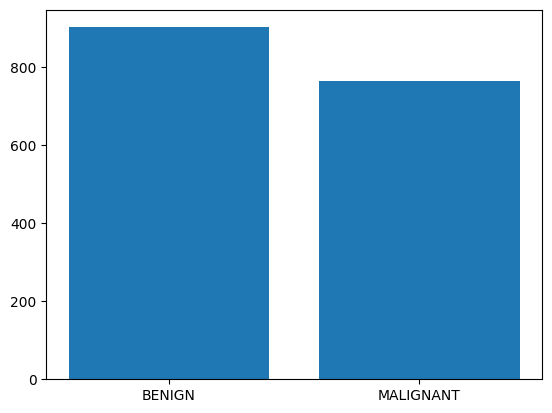

In [26]:
plt.bar(classes[0], classes[1])

In [9]:
sizes = pd.DataFrame(columns=["name", "width", "height"])

target_shape = np.array((1664, 1664))

for filename in os.listdir(dataset_folder):
    if not filename.endswith(".png"):
        continue

    file_path = os.path.join(dataset_folder, filename)
    img = Image.open(file_path)
    img = np.array(img)

    if (False):  # Resize?
        margin = target_shape - np.array(img.shape)
        margin_top = math.ceil(margin[0] / 2.0)
        margin_bot = margin[0] // 2

        margin_left = math.ceil(margin[1] / 2.0)
        margin_right = margin[1] // 2
        img = np.pad(img, ((margin_top, margin_bot), (margin_left, margin_right)), mode="constant", constant_values=0)

        Image.fromarray(img).save(f"{dataset_folder}/resized/{filename}")

    sizes = pd.concat([sizes, pd.DataFrame([{"name": filename, "width": img.shape[1], "height": img.shape[0]}])])

smallest = np.argmin(sizes.drop(columns=["name"]).values, axis=0)
smallest = np.unique(smallest)

biggest = np.argmax(sizes.drop(columns=["name"]).values, axis=0)
biggest = np.unique(biggest)

smallest, biggest

(array([ 371, 1509]), array([165]))

In [10]:
sizes.iloc[smallest]

,name,width,height
0,1089.png,116,108
0,1070.png,92,156


In [11]:
sizes.iloc[biggest]

,name,width,height
0,1473.png,1644,1612


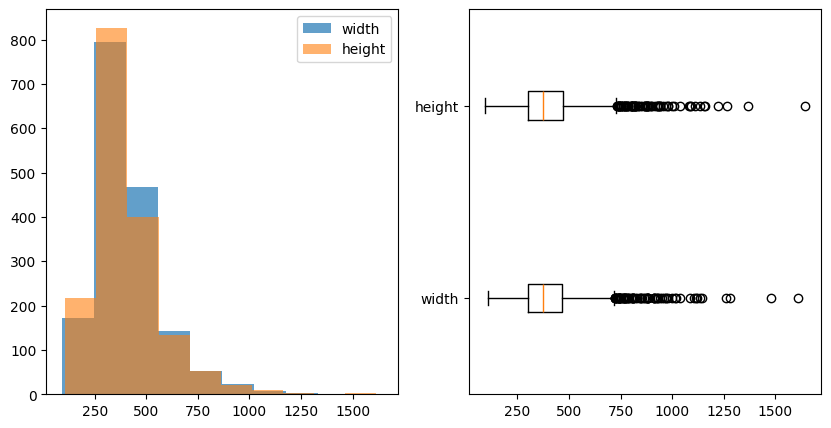

In [37]:
_, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].hist(sizes["width"], alpha=0.7, label="width")
axs[0].hist(sizes["height"], alpha=0.6, label="height")
axs[0].legend()

labels = ["width", "height"]
axs[1].boxplot([sizes["height"], sizes["width"]], orientation="horizontal")
axs[1].set_yticks([1, 2], labels)

plt.show()